# **TASK 02: EXPERIMENTANTION AND UPLIFT TESTING**

**Import** **The** **Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime

**Import** **The** **CSV** **Files**

In [19]:
df = pd.read_csv('/content/drive/MyDrive/QVI_data.csv')
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


**Check The DataType**

In [20]:
df['DATE'].dtype

dtype('O')

**Create a Month and Year Coulmn**

In [21]:
df['DATE'] =  pd.to_datetime(df['DATE'])
df['MONTH_YEAR'] = df['DATE'].dt.strftime('%m/%Y')
df['MONTH_YEAR']

,MONTH_YEAR
0,10/2018
1,09/2018
2,03/2019
3,03/2019
4,11/2018
...,...
264829,12/2018
264830,10/2018
264831,10/2018
264832,10/2018


**Grouping By Store Number and Month Year**

In [22]:
chips_grp_before = df.groupby(['STORE_NBR', 'MONTH_YEAR'])
total_grp = chips_grp_before['TOT_SALES'].sum()
total_grp

STORE_NBR  MONTH_YEAR
1          01/2019       154.80
           02/2019       225.40
           03/2019       192.90
           04/2019       192.90
           05/2019       221.40
                          ...  
272        08/2018       372.85
           09/2018       304.70
           10/2018       430.60
           11/2018       376.20
           12/2018       403.90
Name: TOT_SALES, Length: 3169, dtype: float64

**Total Sales By Store Number**

In [23]:
chips_grp_sale = df.groupby(['STORE_NBR'])
total_sales = chips_grp_sale['TOT_SALES'].sum()
total_sales

,TOT_SALES
STORE_NBR,
1,2393.60
2,2005.80
3,12802.45
4,14647.65
5,9500.80
...,...
268,2601.05
269,11221.80
270,11293.95


**Total Sales in Trial Stores**

In [24]:
trial_store = total_sales[76:88]
trial_store

,TOT_SALES
STORE_NBR,
77,3040.00
78,9381.25
79,11831.20
80,11756.90
81,14361.95
82,4103.50
83,9924.90
84,5396.30
85,13.90


**Total Sales in Trial Stores**:

Store 77 : $3040.00

Store 86 : $10635.35

Store 88 : $16333.25

Since we now have the total sales for the trial stores, the next step is to identify suitable control stores. Out of the 272 available stores, I’ll apply two methods: first, by comparing total sales to find stores with similar performance, and second, by using the Pearson correlation test to check how closely their sales trends align.


**1) - Sorting stores based on total sales to identify the closest match for Store 77.**

In [25]:
total_sorted = total_sales.sort_values(ascending=True)
total_sorted.iloc[70:75]

,TOT_SALES
STORE_NBR,
220,3008.20
50,3009.80
46,3023.45
141,3025.40
77,3040.00


**Isolating** **The** **Stores**

In [26]:
stores_control_one = [220, 50, 46, 141, 77]
control_one = pd.DataFrame({'Value' : total_grp[stores_control_one]})
print(control_one)

                       Value
STORE_NBR MONTH_YEAR        
220       01/2019     238.70
          02/2019     202.90
          03/2019     269.30
          04/2019     220.10
          05/2019     259.60
          06/2019     267.70
          07/2018     244.10
          08/2018     275.00
          09/2018     219.30
          10/2018     293.40
          11/2018     290.70
          12/2018     227.40
50        01/2019     223.90
          02/2019     154.50
          03/2019     227.00
          04/2019     242.40
          05/2019     219.50
          06/2019     270.80
          07/2018     314.40
          08/2018     292.40
          09/2018     258.80
          10/2018     252.80
          11/2018     222.10
          12/2018     331.20
46        01/2019     176.20
          02/2019     222.40
          03/2019     259.20
          04/2019     260.00
          05/2019     243.55
          06/2019     280.30
          07/2018     253.00
          08/2018     240.70
          09/2

**Putting The Stores In a Pivot Chart Format**

In [27]:
pivot_chips1 = control_one.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='Value')
pivot_chips1

STORE_NBR,46,50,77,141,220
MONTH_YEAR,,,,,
01/2019,176.20,223.9,204.4,340.3,238.7
02/2019,222.40,154.5,235.0,246.7,202.9
03/2019,259.20,227.0,278.5,241.7,269.3
04/2019,260.00,242.4,263.5,186.2,220.1
05/2019,243.55,219.5,299.3,194.9,259.6
06/2019,280.30,270.8,264.7,238.4,267.7
07/2018,253.00,314.4,296.8,272.8,244.1
08/2018,240.70,292.4,255.5,225.3,275.0
09/2018,233.00,258.8,225.2,232.8,219.3


**Plot The Pivot_chips1 Data**

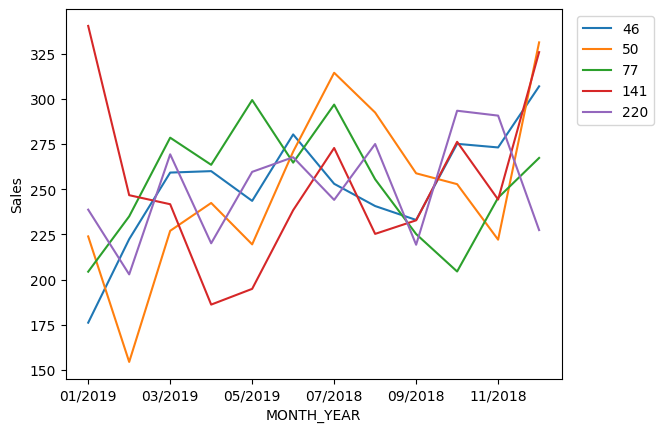

In [28]:
pivot_chips1.plot()
plt.legend(loc = 'upper right', bbox_to_anchor=(1.20, 1))
plt.ylabel('Sales')
plt.show()

The line chart looks messy, so we’ll take a closer look at the correlation for these two and re-visualize.

**Looking at Correlation**

In [29]:
pivot_chips1.corr(method = 'pearson')

STORE_NBR,46,50,77,141,220
STORE_NBR,,,,,
46,1.000000,0.503370,0.386913,-0.113383,0.322455
50,0.503370,1.000000,0.304387,0.277132,0.141485
77,0.386913,0.304387,1.000000,-0.413535,0.013562
141,-0.113383,0.277132,-0.413535,1.000000,-0.060033
220,0.322455,0.141485,0.013562,-0.060033,1.000000


Store 46 and 77  Has The Strongest Correlation at 0.386913 Lets Graph it.

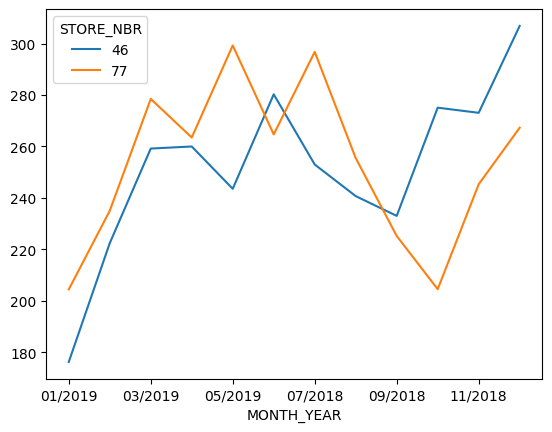

In [30]:
chips_graph = pivot_chips1[[46, 77]]
chips_graph.plot()
plt.show()

**Checking Coorelations of Entire Table**

In [31]:
total_grp_df = pd.DataFrame(total_grp)
total_grp_pivot = total_grp_df.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='TOT_SALES')
total_grp_pivot_table = total_grp_pivot.corr(method = 'pearson')
total_grp_pivot_table[77].sort_values(ascending = False).head(10)

,77
STORE_NBR,
31,1.000000
77,1.000000
11,1.000000
41,0.762292
35,0.699708
167,0.696075
184,0.645118
63,0.633858
234,0.632204


These are the top 10 stores correlated with Store 77, where Store 41 ranks 3rd.

**I’ll now compare their total sales before making a final decision.**

In [32]:
# grabbing the total sales sorted series to see how the sales stack up for the top 4 above by strongest correlation
total_sorted.loc[[31, 11, 41, 35]]

,TOT_SALES
STORE_NBR,
31,14.8
11,6.7
41,2570.2
35,1608.9


**Store 31 & 11 Sales Are Way Too Low To Use**

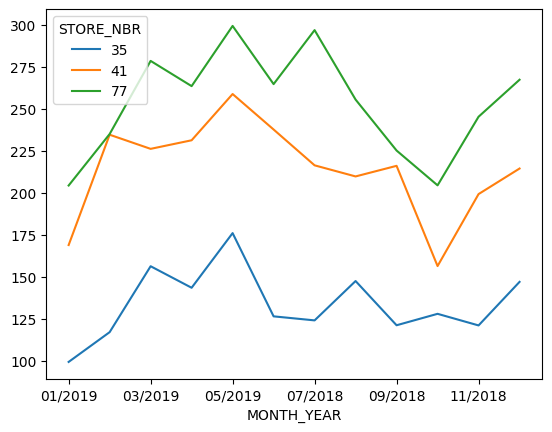

In [33]:
# grabbing store 41, 35, 77
three_amigos_77 = total_grp[[41,35, 77]]

# making DataFrame
amigos_77_df = pd.DataFrame(three_amigos_77)

# Pivoting the DataFrame
amigos_77_pivot = amigos_77_df.pivot_table(index = 'MONTH_YEAR', columns = 'STORE_NBR', values = 'TOT_SALES')
amigos_77_pivot.plot()
plt.show()

Store 35 even thought it has a good correlation store 41 is much better fit. Store 31 & 11 even though best match correlation wise it does not make sense with sales with volume. so i will go with store 41.

for trail 77, i will use some store number 12 as a control store. it's a 0.386913 correlation.

**2) - Sorting Stores By Total Sales Looking For a Match For Store 86**

In [34]:
total_sorted.iloc[178:201]

,TOT_SALES
STORE_NBR,
109,10399.10
191,10404.70
196,10408.20
229,10417.90
97,10432.05
102,10440.70
105,10472.50
232,10485.30
57,10532.30


**Isolating The Stores**

In [35]:
stores_control_two = [109, 191, 196, 229, 97, 102, 105, 232, 57, 172, 113, 225, 62, 236, 227, 155, 86, 247, 13, 164, 106, 55, 138]
control_two = pd.DataFrame({'Value' : total_grp[stores_control_two]})
print(control_two)

                       Value
STORE_NBR MONTH_YEAR        
109       01/2019      858.6
          02/2019      858.4
          03/2019     1039.2
          04/2019      728.6
          05/2019      720.6
...                      ...
138       08/2018      707.4
          09/2018      913.6
          10/2018     1015.4
          11/2018      991.4
          12/2018      918.0

[276 rows x 1 columns]


**Putting The Stores In a Pivot Chart Format**

In [36]:
pivot_chips2 = control_two.pivot_table(index='MONTH_YEAR', columns='STORE_NBR', values='Value')
pivot_chips2

STORE_NBR,13,55,57,62,86,97,102,105,106,109,...,164,172,191,196,225,227,229,232,236,247
MONTH_YEAR,,,,,,,,,,,,,,,,,,,,,
01/2019,927.0,1003.20,852.8,887.8,841.40,844.60,898.0,807.0,869.60,858.6,...,950.2,897.2,851.6,919.4,845.0,986.0,822.4,811.2,838.2,906.2
02/2019,868.0,757.80,919.8,864.4,913.20,755.20,773.4,751.8,833.20,858.4,...,753.8,918.4,848.8,732.0,782.8,804.4,827.6,899.9,914.8,930.2
03/2019,1035.6,943.60,807.4,889.8,1026.80,853.60,821.8,916.8,938.60,1039.2,...,991.0,727.2,965.4,980.8,829.0,999.4,1031.8,818.4,896.8,888.4
04/2019,1024.4,851.80,900.0,885.2,848.20,813.00,718.6,944.6,815.40,728.6,...,1015.6,903.0,1008.8,906.6,1026.2,826.6,914.6,762.6,848.0,1032.0
05/2019,803.2,736.85,846.7,754.9,889.30,883.30,890.9,818.1,878.75,720.6,...,874.1,811.6,740.9,901.3,899.6,837.6,815.3,928.0,979.0,932.5
06/2019,840.6,999.60,911.0,846.8,838.00,862.00,950.0,835.0,690.20,814.0,...,795.0,1072.0,888.2,761.2,938.4,818.0,879.8,668.2,785.0,890.4
07/2018,811.8,889.60,839.6,983.6,892.20,848.20,782.4,928.9,1042.80,884.0,...,853.2,820.8,826.2,876.2,865.0,885.8,876.0,1026.7,952.0,852.4
08/2018,756.9,910.30,915.4,792.4,764.05,917.35,986.4,923.7,799.85,828.3,...,920.2,758.0,861.4,848.7,833.4,862.3,757.8,727.9,970.8,781.0
09/2018,840.0,1028.80,792.8,972.8,914.60,908.80,970.4,846.6,1158.40,871.4,...,841.4,816.4,803.2,858.4,958.4,779.0,916.8,939.8,864.6,852.4


**Plotting The pivot_chips2 Chart**

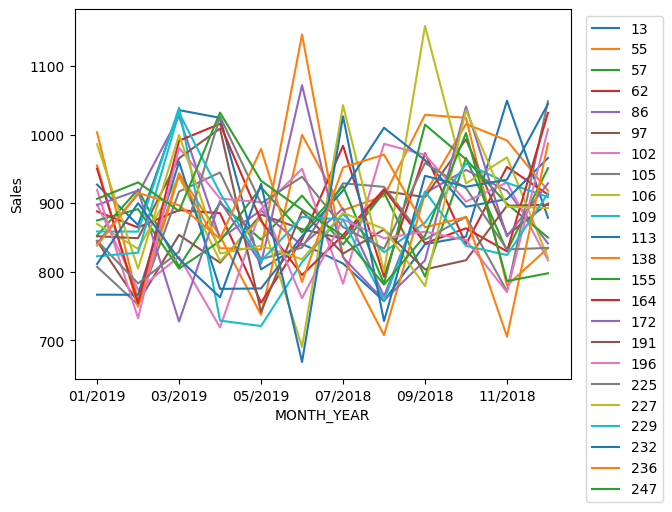

In [37]:
pivot_chips2.plot()
plt.legend(loc = 'upper right', bbox_to_anchor=(1.20, 1))
plt.ylabel('Sales')
plt.show()

The line chart looks messy, sowe’ll take a closer look at the correlation for these two and re-visualize.

**Looking At Correlation**

In [38]:
pivot_chips2.corr(method = 'pearson')

STORE_NBR,13,55,57,62,86,97,102,105,106,109,...,164,172,191,196,225,227,229,232,236,247
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
13,1.000000,-0.125341,-0.291218,0.365314,0.457947,-0.373037,-0.377415,-0.059766,0.049336,0.324289,...,0.357477,-0.091999,0.733656,0.166098,0.043419,0.289917,0.508201,-0.084443,-0.597718,0.167139
55,-0.125341,1.000000,-0.039301,0.181823,0.043906,0.495256,0.418809,0.124132,0.181864,0.326968,...,0.060884,0.250338,0.018181,0.101949,0.338013,0.354941,0.234072,-0.320462,-0.206578,0.096625
57,-0.291218,-0.039301,1.000000,-0.428165,-0.402687,0.221201,-0.139586,0.301428,-0.658612,-0.124668,...,0.060840,0.665384,0.081015,-0.113210,-0.005863,0.106827,-0.335684,-0.100878,0.237461,0.237256
62,0.365314,0.181823,-0.428165,1.000000,0.276452,-0.184301,-0.206387,0.113294,0.634354,0.426023,...,-0.006044,-0.100249,0.227897,0.049385,0.005783,-0.028706,0.426077,0.461276,-0.334550,-0.295701
86,0.457947,0.043906,-0.402687,0.276452,1.000000,-0.015617,-0.226422,-0.202451,0.510548,0.643075,...,-0.117970,-0.156398,0.043345,0.081832,-0.109479,0.393785,0.596886,0.327006,-0.164982,0.250601
97,-0.373037,0.495256,0.221201,-0.184301,-0.015617,1.000000,0.578719,0.334039,0.203434,0.241536,...,0.140764,0.128774,-0.359215,0.240357,0.224941,0.403000,-0.120038,0.141757,0.162069,-0.106598
102,-0.377415,0.418809,-0.139586,-0.206387,-0.226422,0.578719,1.000000,-0.303843,0.088393,0.057036,...,-0.324841,0.000426,-0.454167,-0.283326,-0.023039,-0.009479,-0.406497,-0.251850,-0.245020,-0.460621
105,-0.059766,0.124132,0.301428,0.113294,-0.202451,0.334039,-0.303843,1.000000,-0.084228,0.117184,...,0.754963,-0.099642,0.374381,0.730895,0.169544,0.159843,0.407354,0.176014,0.520565,-0.131195
106,0.049336,0.181864,-0.658612,0.634354,0.510548,0.203434,0.088393,-0.084228,1.000000,0.363415,...,-0.132514,-0.452421,-0.327944,0.110802,0.053068,0.054562,0.233852,0.599607,-0.022502,-0.155990


**Store 109 and 86 Has The Strongest Correlation at 0.643. Let's Graph It**

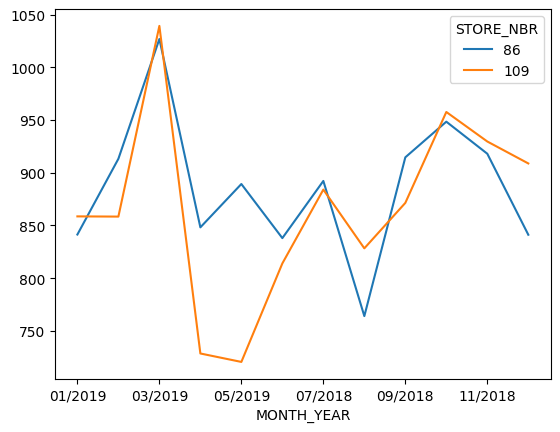

In [39]:
chips2_graph = pivot_chips2[[86, 109]]
chips2_graph.plot()
plt.show()

**Checking Correlation Of Entire Table**

In [40]:
total_grp_pivot_table[86].sort_values(ascending=False).head(10)

,86
STORE_NBR,
31,1.000000
86,1.000000
193,0.933364
159,0.675773
231,0.674071
109,0.643075
132,0.629011
260,0.623775
61,0.617243


These are the top 10 stores correlated with Store 86, where Store 109 rankend in 5th place.

**I’ll now compare their total sales before making a final decision.**

In [41]:
# Grabbing the total sales sorted series to see how sales stack up for the top 5 above by strongest correlation
total_sorted.loc[[31,193,159,231,109]]

,TOT_SALES
STORE_NBR,
31,14.8
193,13.1
159,338.9
231,12996.0
109,10399.1


**Store 31, 159, & 193 Sales Are Way Too Low To Use**.

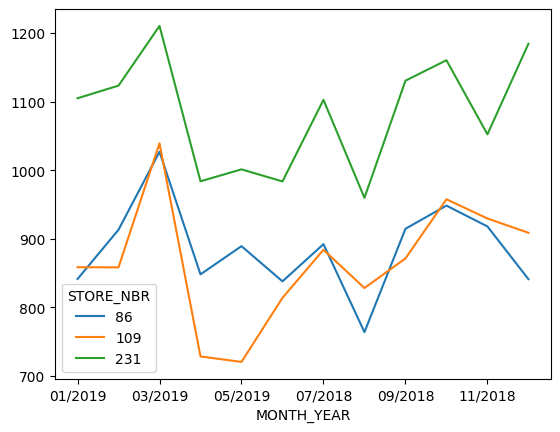

In [42]:
# grabbing store 231, 109, & 193 from total group dataframe
three_amigos_86 = total_grp[[231, 109, 86]]

# making dataframe
amigos_86_df = pd.DataFrame(three_amigos_86)

# Pivoting the DataFrame
amigos_86_pivot = amigos_86_df.pivot_table(index = 'MONTH_YEAR', columns = 'STORE_NBR', values = 'TOT_SALES')
amigos_86_pivot.plot()
plt.show()

Store 231 even thought it has a good correlation store 109 is much better fit. Store 31 even though is the best match correlation wise it does not make sense with sales with volume. so i will go with store 41.

for trail 86, i will use some store number 109 as a control store. it's a 0.643 correlation.

**3) - Sorting Stores By Total Sales Looking For a Match 88**

In [43]:
# Looking for the control store for store 88
# reusing total group pivot table to find top 10 correlated stores

total_grp_pivot_table[88].sort_values(ascending=False).head(10)

,88
STORE_NBR,
206,1.000000
88,1.000000
159,0.862608
193,0.836296
201,0.737583
188,0.733516
229,0.707309
228,0.697039
61,0.686658


These are the top 10 stores correlated with Store 17, where Store 12 ranks 3rd.

**I’ll now compare their total sales before making a final decision**.

In [44]:
# grabbing the total sales sorted series rto see how the sales stack up for top 5 above strongest correlations
total_sorted.loc[[206, 88, 159, 193, 201, 188, 229, 228, 61, 140]]

,TOT_SALES
STORE_NBR,
206,7.60
88,16333.25
159,338.90
193,13.10
201,14298.70
188,3086.00
229,10417.90
228,4236.30
61,562.90


**Store 206, 159 188, 61, 140 & 193 Sales Are Way Too Low To Use**

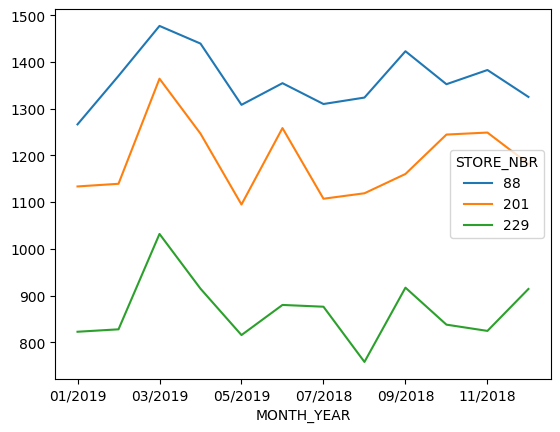

In [45]:
# grabbing store 201, 229, 88 from total group dataframe
three_amigos_88 = total_grp[[201, 229, 88]]

# making Dataframe
amigos_88_df = pd.DataFrame(three_amigos_88)

# pivoting the dataframe
amigos_86_pivot = amigos_88_df.pivot_table(index = 'MONTH_YEAR', columns = 'STORE_NBR', values = 'TOT_SALES')
amigos_86_pivot.plot()
plt.show()

**Store 201 Comes Close To The Pattern of Store 88**

In [46]:
sorted_88 = total_grp_pivot_table[88].sort_values(ascending=False)
sorted_88[201]

np.float64(0.7375831241350634)

Store 229 even though it has good correlation store 201 is much better fit. Store 206 even though is a best match correlation wise it does not make sense with sales volume. so i will go with store 201.

For Trial Store 88, I'll Will Use Store Number 201 as a Control Store. it's a 0.737 Correlation

**Creating New DataFrame for Trial &  Control Store**

In [47]:
# selecting trial and control stores from chips trial
trial_store_77 = df.loc[df['STORE_NBR'] == 77]
control_store_46 = df.loc[df['STORE_NBR'] == 46]

trial_store_86 = df.loc[df['STORE_NBR'] == 86]
control_store_109 = df.loc[df['STORE_NBR'] == 109]

trial_store_88 = df.loc[df['STORE_NBR'] == 88]
control_store_201 = df.loc[df['STORE_NBR'] == 201]

trial_store_77

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_YEAR
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,03/2019
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,04/2019
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,09/2018
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,02/2019
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,01/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264818,2330321,2018-07-30,77,236756,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,YOUNG SINGLES/COUPLES,Mainstream,07/2018
264819,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget,11/2018
264820,2330431,2018-07-31,77,236770,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Mainstream,07/2018
264821,2330461,2018-07-21,77,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110,INFUZIONS,OLDER FAMILIES,Budget,07/2018


**Let's Start With Store 77 and 46**

In [48]:
# looking at total sales and produxt sold
trial_store_77[['TOT_SALES', 'PROD_QTY']].sum()

,0
TOT_SALES,3040.0
PROD_QTY,872.0


In [49]:
# looking at total sales and product sold
control_store_46[['TOT_SALES', 'PROD_QTY']].sum()

,0
TOT_SALES,3023.45
PROD_QTY,877.00


In [50]:
# looking at repeat customer for trial store
trial_store_77['LYLTY_CARD_NBR'].value_counts()

,count
LYLTY_CARD_NBR,
77476,5
77066,4
77313,4
77305,4
77093,4
...,...
77108,1
77298,1
77107,1


In [51]:
# total customer transactions
trial_store_77[['LYLTY_CARD_NBR']].count()

,0
LYLTY_CARD_NBR,563


In [52]:
# looking at repeat customer for control store
control_store_46['LYLTY_CARD_NBR'].value_counts()

,count
LYLTY_CARD_NBR,
46188,6
46394,5
46313,5
46195,5
46458,4
...,...
46491,1
46006,1
46005,1


In [53]:
# total customer transactions
control_store_46[['LYLTY_CARD_NBR']].count()

,0
LYLTY_CARD_NBR,535


In [54]:
# counting repeat customer that purchased more than once

repeat_customers = trial_store_77['LYLTY_CARD_NBR'].value_counts()
print(repeat_customers.head(24))

repeats_total = 24

LYLTY_CARD_NBR
77476    5
77066    4
77313    4
77305    4
77093    4
77338    4
77344    4
77205    4
77109    4
77454    4
77280    3
77271    3
77390    3
77402    3
77263    3
77258    3
77281    3
77308    3
77252    3
77049    3
77383    3
77069    3
77044    3
77287    3
Name: count, dtype: int64


In [55]:
# counting repeat customers that purshased more than once
repeat_customers2 = control_store_46['LYLTY_CARD_NBR'].value_counts()
print(repeat_customers2.head(9))

repeats_total_two = 9

LYLTY_CARD_NBR
46188    6
46394    5
46313    5
46195    5
46458    4
46289    4
46056    4
46416    4
46317    4
Name: count, dtype: int64


In [56]:
# groupping stores by month

grouped77 = trial_store_77.groupby('MONTH_YEAR')
grouped46 = control_store_46.groupby('MONTH_YEAR')

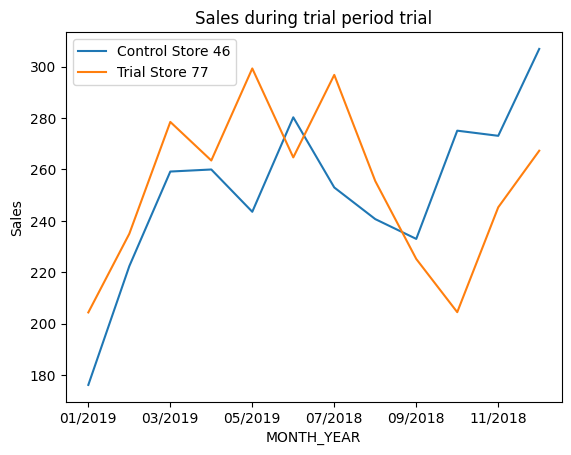

In [57]:
grouped46['TOT_SALES'].sum().plot(label = 'Control Store 46')
grouped77['TOT_SALES'].sum().plot(label = 'Trial Store 77')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales during trial period trial')
plt.show()

For the first pair we can see a clear difference between trial store and the control store. lets look at the next pair of stores.

**Let's Start With Store 86 & 109**

In [58]:
# looking at total sales & product sold.
trial_store_86[['TOT_SALES', 'PROD_QTY']].sum()

,0
TOT_SALES,10635.35
PROD_QTY,3066.00


In [59]:
# looking at total sales & product sold.
control_store_109[['TOT_SALES', 'PROD_QTY']].sum()

,0
TOT_SALES,10399.1
PROD_QTY,2977.0


In [60]:
# looking at repeat customer for trial store
trial_store_86['LYLTY_CARD_NBR'].value_counts()

,count
LYLTY_CARD_NBR,
86133,13
86112,13
86151,12
86075,12
86008,12
...,...
155000,1
155003,1
155004,1


In [61]:
# total customer transactions
repeat_customers_86 = trial_store_86['LYLTY_CARD_NBR'].value_counts()
repeat_customers_86.iloc[:125]

,count
LYLTY_CARD_NBR,
86133,13
86112,13
86151,12
86075,12
86008,12
...,...
86208,6
86030,6
86031,6


In [62]:
# looking at repeat customers for control store
control_store_109['LYLTY_CARD_NBR'].value_counts()

,count
LYLTY_CARD_NBR,
109036,16
109080,14
109086,13
109078,12
109212,12
...,...
109121,1
109017,1
109200,1


In [63]:
# total customer transactions
control_store_109[['LYLTY_CARD_NBR']].count()

,0
LYLTY_CARD_NBR,1505


In [64]:
# we have 111 repeat customers for store 86
repeat_customers_109 = control_store_109['LYLTY_CARD_NBR'].value_counts()
repeat_customers_109.iloc[:115]

,count
LYLTY_CARD_NBR,
109036,16
109080,14
109086,13
109078,12
109212,12
...,...
109075,6
109066,6
109065,6


In [65]:
# grouping stores by month
grouped86 = trial_store_86.groupby('MONTH_YEAR')
grouped109 = control_store_109.groupby('MONTH_YEAR')

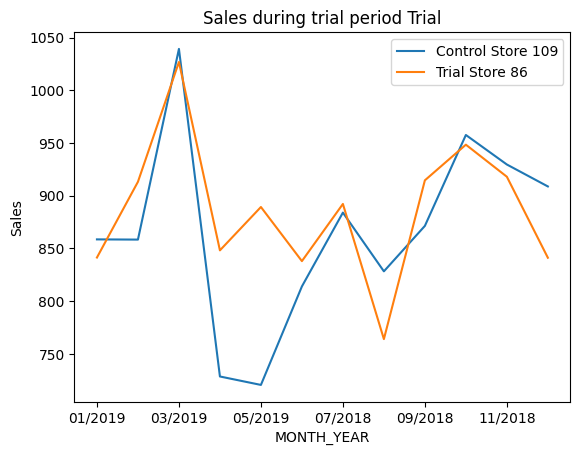

In [66]:
grouped109['TOT_SALES'].sum().plot(label = 'Control Store 109')
grouped86['TOT_SALES'].sum().plot(label = 'Trial Store 86')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales during trial period Trial')
plt.show()

For the second pair we can see a clear difference between the trial store and the control store. Let's look at the next pair of stores.

**Let's Start With Store 88 & 201**

In [67]:
# looking at total sales & product sold
trial_store_88[['TOT_SALES', 'PROD_QTY']].sum()

,0
TOT_SALES,16333.25
PROD_QTY,3718.00


In [68]:
# looking at total sales & product sold
control_store_201[['TOT_SALES', 'PROD_QTY']].sum()

,0
TOT_SALES,14298.7
PROD_QTY,3262.0


In [69]:
# looking at repeat customers for trial store
trial_store_88['LYLTY_CARD_NBR'].value_counts()

,count
LYLTY_CARD_NBR,
88105,13
88247,11
88358,11
88351,10
88348,10
...,...
88355,1
88372,1
2370701,1


In [70]:
# total customer transactions
trial_store_88[['LYLTY_CARD_NBR']].count()

,0
LYLTY_CARD_NBR,1873


In [71]:
# we have 145 repeat customers for store 86
repeat_customers_88 = trial_store_88['LYLTY_CARD_NBR'].value_counts()
repeat_customers_88.iloc[:146]

,count
LYLTY_CARD_NBR,
88105,13
88247,11
88358,11
88351,10
88348,10
...,...
88218,6
88134,6
88194,6


In [72]:
# looking at repeat customers for control store
control_store_201['LYLTY_CARD_NBR'].value_counts()

,count
LYLTY_CARD_NBR,
201294,13
201120,11
201186,11
201206,10
201018,10
...,...
201057,1
201037,1
201043,1


In [73]:
# total customer transactions
control_store_201[['LYLTY_CARD_NBR']].count()

,0
LYLTY_CARD_NBR,1654


In [74]:
# we have 109 repeat customers for store 86
repeat_customers_109 = control_store_201['LYLTY_CARD_NBR'].value_counts()
repeat_customers_109.iloc[:110]

,count
LYLTY_CARD_NBR,
201294,13
201120,11
201186,11
201206,10
201018,10
...,...
201347,5
201348,5
201365,5


In [75]:
# grouping stores by month
grouped88 = trial_store_88.groupby('MONTH_YEAR')
grouped201 = control_store_201.groupby('MONTH_YEAR')

<Axes: xlabel='MONTH_YEAR'>

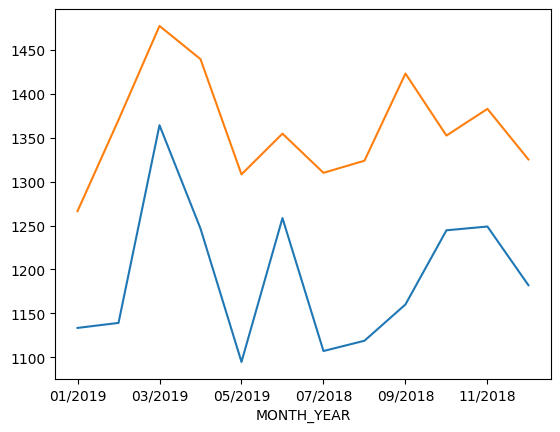

In [76]:
grouped201['TOT_SALES'].sum().plot(label = 'Control Store 201')
grouped88['TOT_SALES'].sum().plot(label = 'Trial Store 88')

For the third pair we can see a clear difference between the trial store and control store.

**Visualize** **The** **Product** **Quantity** **Sold**

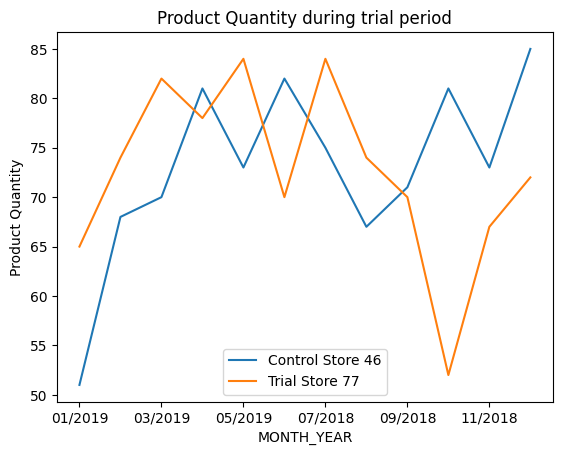

In [77]:
# Pair - 01 (46, 77)
grouped46['PROD_QTY'].sum().plot(label = 'Control Store 46')
grouped77['PROD_QTY'].sum().plot(label = 'Trial Store 77')
plt.ylabel('Product Quantity')
plt.legend()
plt.title('Product Quantity during trial period')
plt.show()

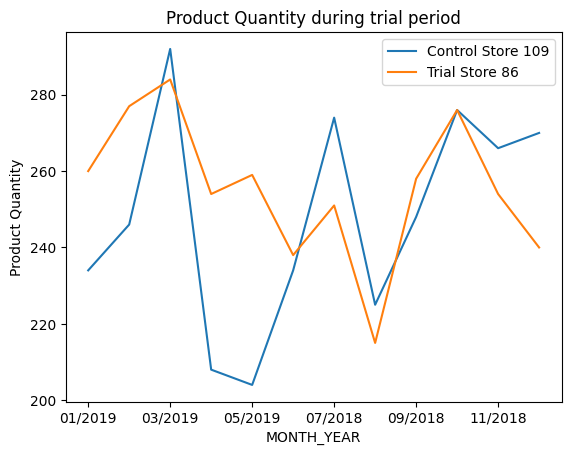

In [78]:
# Pair - 02 (109,86)
grouped109['PROD_QTY'].sum().plot(label = 'Control Store 109')
grouped86['PROD_QTY'].sum().plot(label = 'Trial Store 86')
plt.ylabel('Product Quantity')
plt.legend()
plt.title('Product Quantity during trial period')
plt.show()

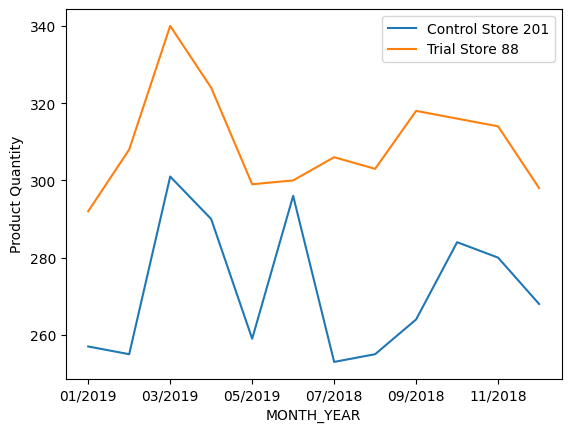

In [79]:
# Pair - 03 (201, 88)
grouped201['PROD_QTY'].sum().plot(label = 'Control Store 201')
grouped88['PROD_QTY'].sum().plot(label = 'Trial Store 88')
plt.ylabel('Product Quantity')
plt.legend()

As we can see by the graph the trail stores outperformed the control stores by quantity sold

**Let's See How They Stack Up With The Average Transactions Per Customer**

In [80]:
grouped77['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.048417132216015)

In [81]:
grouped46['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.0428849902534114)

In [82]:
grouped86['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.2544861337683524)

In [83]:
grouped109['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.2918454935622317)

In [84]:
grouped88['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.2363036303630364)

In [85]:
grouped201['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.1689045936395759)

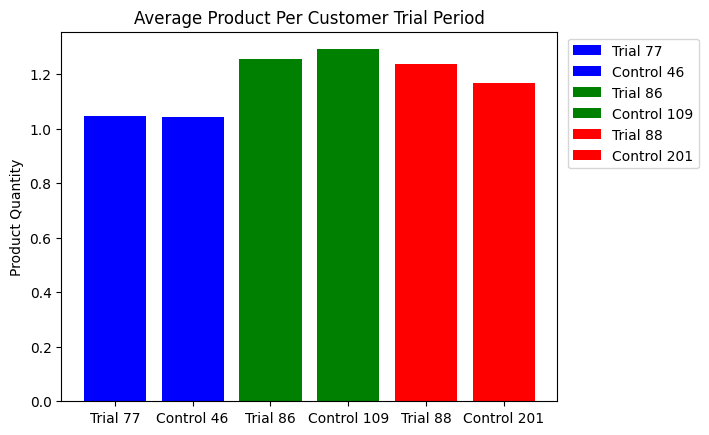

In [89]:
group1 = ['Trial 77' , 'Control 46']
group2 = ['Trial 86' , 'Control 109']
group3 = ['Trial 88' , 'Control 201']

values_grp1 = [1.048417132216015 , 1.0428849902534114]
values_grp2 = [1.2544861337683524 , 1.2918454935622317]
values_grp3 = [1.2363036303630364 , 1.1689045936395759]

plt.bar(group1 , values_grp1 , label = group1 , color = 'b')
plt.bar(group2 , values_grp2 , label = group2 , color = 'g')
plt.bar(group3 , values_grp3 , label = group3 , color = 'r')
plt.ylabel('Product Quantity')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.3 , 1))
plt.title('Average Product Per Customer Trial Period')
plt.show()

As we can see The average transactions were slightly higher for 1 of the 3 trial stores

**RECOMMENDATIONS**

From the analysis, it’s clear that the trial stores generally outperformed their matched control stores during the test period in terms of both total sales and product quantity sold. However, the uplift in average transactions per customer was mixed — some stores showed small improvements, while others were almost the same as their controls.

**Store** **77** **vs** **Control** **46 :**

**Observation**: Store 77’s sales and product quantities were consistently higher than its control store. The repeat customer base was also stronger, showing that the trial layout helped drive higher engagement.

**Recommendation**: Roll out the trial layout to other stores with similar customer profiles. Store 77’s performance suggests the new layout works well for encouraging both more purchases and higher sales.



**Store 86 vs Control 109 :**

**Observation**: Sales were higher in Store 86 compared to its control, but the average transactions per customer were slightly lower than Control 109. This suggests the uplift came mainly from attracting more customers rather than from repeat transactions.

**Recommendation**: Maintain the new layout but support it with promotional campaigns targeting repeat purchases. This could balance the slight gap in transaction frequency while leveraging the strong sales uplift.



**Store 88 vs Control 201 :**

**Observation**: Store 88 showed a clear uplift in both total sales and product quantities compared to Control 201. The average transactions per customer were also higher, though modestly. This suggests that both customer numbers and engagement improved.

**Recommendation**: Strongly recommend rolling out the trial layout to stores similar to Store 88, as it demonstrates the strongest overall impact across all metrics.

**General** **Insights**

Across all three trial stores, total sales and product volumes increased, confirming that the new layout positively impacts customer purchasing behavior.
The uplift in average transactions per customer was only noticeable in some stores, meaning the layout alone isn’t enough to drive repeat frequency — but it does increase basket size and sales per visit.
Since the strongest results were observed in Stores 77 and 88, the rollout should prioritize stores with similar profiles first before a wider expansion.

**Final** **Recommendation**

The trial layout was successful overall and should be scaled across more stores, starting with those most similar to 77 and 88. For stores like 86, pair the rollout with targeted promotions (e.g., loyalty discounts or repeat-purchase incentives) to strengthen transaction frequency. By combining layout changes with marketing support, the supermarket can maximize sales uplift while ensuring long-term customer engagement.